In [19]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [20]:
import tensorflow as tf
import matplotlib.pyplot as plt
train_data_labels = pd.read_csv('C:/Users/sahil/Downloads/cassava-leaf-disease-classification/train.csv')
print(train_data_labels.shape)
train_data_labels.head()

(21397, 2)


,image_id,label
0,1000015157.jpg,0
1,1000201771.jpg,3
2,100042118.jpg,1
3,1000723321.jpg,1
4,1000812911.jpg,3


In [21]:
main_path = "C:/Users/sahil/Downloads/cassava-leaf-disease-classification/train_images/"

In [22]:
Na_Labels=train_data_labels.isna()
Na_Labels.sum()

image_id    0
label       0
dtype: int64

3    13158
4     2577
2     2386
1     2189
0     1087
Name: label, dtype: int64


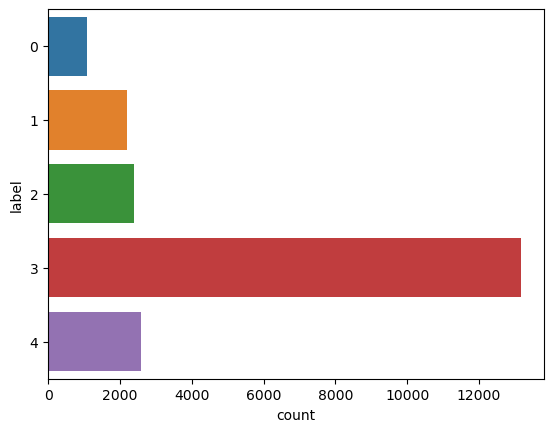

In [23]:
import seaborn as sn
print(train_data_labels['label'].value_counts())
sn.countplot(y="label", data=train_data_labels);

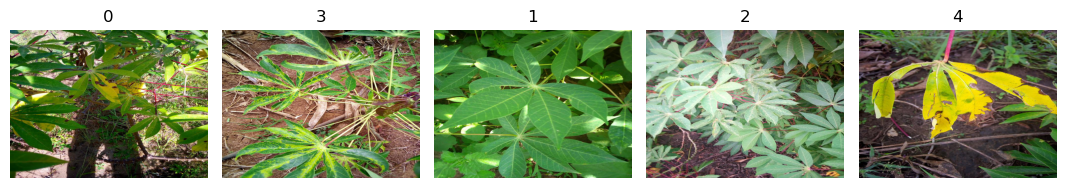

In [24]:
from PIL import Image
plt.figure(figsize=(15,12))
for id,label in enumerate(train_data_labels.label.unique()):
    plt.subplot(4,7,id+1)
    df = train_data_labels.loc[train_data_labels['label']==label].reset_index(drop=True)
    img_path = df.loc[0,'image_id']
    img_path = main_path + img_path
    image = Image.open(img_path)
    plt.imshow(image)
    plt.axis('off')
    plt.title(label)
plt.tight_layout()
plt.show()

In [25]:
path_sample = main_path + train_data_labels.loc[0,'image_id']
sample_image = Image.open(path_sample)
sample_image.size

(800, 600)

In [9]:
from tensorflow.keras.applications.vgg16 import VGG16
from keras.layers import Dense, GlobalAveragePooling2D

import keras

vgg16_base_model = VGG16(include_top=False, input_shape=(256,256,3), weights='imagenet')
print("Number of layers in the base model: ", len(vgg16_base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 15

# Freeze all the layers before the `fine_tune_at` layer
for layer in vgg16_base_model.layers[:fine_tune_at]:
  layer.trainable = False
vgg16_base_model_out = vgg16_base_model.output   
vgg16_base_model_out = keras.layers.GlobalAveragePooling2D()(vgg16_base_model_out)
# Adding a fully connected layer having 1024 neurons
vgg16_base_model_out = Dense(1024, activation='relu')(vgg16_base_model_out)
output = keras.layers.Dense(5, activation='softmax')(vgg16_base_model_out)

vgg16_model = keras.models.Model(inputs = vgg16_base_model.input, outputs = output)
vgg16_model.summary()

Number of layers in the base model:  19
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPool

In [38]:
from tensorflow.keras.applications import ResNet50
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
# Download the architecture of ResNet50 with ImageNet weights
ResNet50_base_model = ResNet50(include_top=False, input_shape=(256,256,3), weights='imagenet')
print("Number of layers in the base model: ", len(ResNet50_base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Training only top layers i.e. the layers which we have added in the end
for layer in ResNet50_base_model.layers[:fine_tune_at]:
  layer.trainable = False


 
# Taking the output of the last convolution block in ResNet50
ResNet50_base_model_out = ResNet50_base_model.output
 
# Adding a Global Average Pooling layer
ResNet50_base_model_out = GlobalAveragePooling2D()(ResNet50_base_model_out)
 
# Adding a fully connected layer having 1024 neurons
ResNet50_base_model_out = Dense(1024, activation='relu')(ResNet50_base_model_out)
 
# Adding a fully connected layer having 2 neurons which will
# give the probability of image having either dog or cat

 
# Model to be trained

# x = AveragePooling2D(pool_size=(7, 7))(x)
# x = Flatten(name="flatten")(x)
# x = Dense(256, activation="relu")(x)
# x = Dropout(0.5)(x)
# x = Dense(len(config.CLASSES), activation="softmax")(x)

output = Dense(5, activation='softmax')(ResNet50_base_model_out)

resnet_model = Model(inputs=ResNet50_base_model.inputs, outputs=output)
resnet_model.summary()



Number of layers in the base model:  175
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                   

In [39]:
resnet_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)

In [28]:
vgg16_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)

NameError: name 'vgg16_model' is not defined

In [35]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_labels.label = train_data_labels.label.astype('str')

train_data_generator = ImageDataGenerator(validation_split=0.2,
                                  preprocessing_function = None,
                                  rescale = 1./255,
                                  rotation_range = 45,
                                  zoom_range = 0.2,
                                  horizontal_flip = True,
                                  vertical_flip = True,
                                  #fill_mode = 'Nearest',
                                  shear_range = 0.1,
                                  height_shift_range = 0.1,
                                  width_shift_range = 0.1,)

train_data = train_data_generator.flow_from_dataframe(dataframe = train_data_labels,
                                                   directory = 'C:/Users/sahil/Downloads/cassava-leaf-disease-classification/train_images/',
                                                   subset='training',
                                                   x_col = 'image_id',
                                                   y_col = 'label',
                                                   target_size = (256,256),
                                                   batch_size = 128,
                                                   class_mode = 'sparse',
                                                   )

validation_data_generator = ImageDataGenerator(validation_split = 0.2,
                                       rescale=1./255,
                                       )

validation_data = validation_data_generator.flow_from_dataframe(train_data_labels,
                         directory = 'C:/Users/sahil/Downloads/cassava-leaf-disease-classification/train_images/',
                         subset = "validation",
                         x_col = "image_id",
                         y_col = "label",
                         target_size = (256,256),
                         batch_size = 128,
                         class_mode = "sparse")

Found 17118 validated image filenames belonging to 5 classes.
Found 4279 validated image filenames belonging to 5 classes.


In [13]:
epoch_steps = len(train_data_labels)*0.8 / 128
val_steps = len(train_data_labels)*0.2 / 128

history_vgg = vgg16_model.fit(
    train_data,
    steps_per_epoch = epoch_steps,
    epochs = 10,
    validation_data = validation_data,
    validation_steps = val_steps,
)

Epoch 1/10
133/133 [==============================] - 3214s 24s/step - loss: 1.1462 - accuracy: 0.6275 - val_loss: 0.9096 - val_accuracy: 0.6511
Epoch 2/10
133/133 [==============================] - 3464s 26s/step - loss: 0.9022 - accuracy: 0.6604 - val_loss: 0.8551 - val_accuracy: 0.6717
Epoch 3/10
133/133 [==============================] - 3222s 24s/step - loss: 0.8381 - accuracy: 0.6809 - val_loss: 0.7961 - val_accuracy: 0.6988
Epoch 4/10
133/133 [==============================] - 3268s 24s/step - loss: 0.7794 - accuracy: 0.7073 - val_loss: 0.7444 - val_accuracy: 0.7217
Epoch 5/10
133/133 [==============================] - 3298s 25s/step - loss: 0.7378 - accuracy: 0.7207 - val_loss: 0.6969 - val_accuracy: 0.7359
Epoch 6/10
133/133 [==============================] - 3319s 25s/step - loss: 0.7049 - accuracy: 0.7406 - val_loss: 0.7109 - val_accuracy: 0.7341
Epoch 7/10
133/133 [==============================] - 3123s 23s/step - loss: 0.6770 - accuracy: 0.7522 - val_loss: 0.6848 - val_ac

In [40]:

history_resnet=resnet_model.fit_generator(train_data,
                         steps_per_epoch = len(train_data_labels)*0.8 /128,
                         epochs = 10,
                         validation_data = validation_data,
                         validation_steps = len(train_data_labels)*0.2 / 128)

C:\Users\sahil\AppData\Local\Temp\ipykernel_48660\3620402837.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_resnet=resnet_model.fit_generator(train_data,


Epoch 1/10
133/133 [==============================] - 3287s 25s/step - loss: 1.1976 - accuracy: 0.6136 - val_loss: 10.6466 - val_accuracy: 0.6165
Epoch 2/10
133/133 [==============================] - 3480s 26s/step - loss: 1.0485 - accuracy: 0.6348 - val_loss: 7.8146 - val_accuracy: 0.6165
Epoch 3/10
133/133 [==============================] - 3322s 25s/step - loss: 1.0240 - accuracy: 0.6394 - val_loss: 2.7379 - val_accuracy: 0.6165
Epoch 4/10
133/133 [==============================] - 3332s 25s/step - loss: 1.0087 - accuracy: 0.6385 - val_loss: 2.8835 - val_accuracy: 0.6165
Epoch 5/10
133/133 [==============================] - 3440s 26s/step - loss: 0.9938 - accuracy: 0.6423 - val_loss: 1.4238 - val_accuracy: 0.4270
Epoch 6/10
133/133 [==============================] - 3063s 23s/step - loss: 0.9832 - accuracy: 0.6436 - val_loss: 5.1884 - val_accuracy: 0.6174
Epoch 7/10
133/133 [==============================] - 3393s 25s/step - loss: 0.9686 - accuracy: 0.6459 - val_loss: 1.2415 - val_a

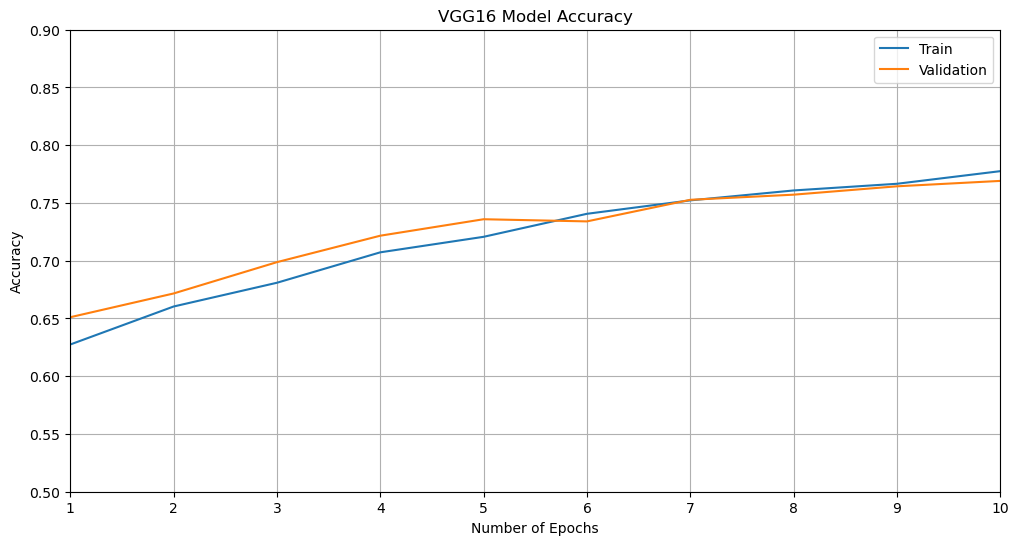

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

epochs_range= range(1,11)

plt.plot( epochs_range, history_vgg.history['accuracy'], label="Training Accuracy")

plt.plot(epochs_range, history_vgg.history['val_accuracy'], label="Validation Accuracy")

plt.axis(ymin=0.5,ymax=0.9, xmin=1,xmax=10)

plt.grid()

plt.title('VGG16 Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Number of Epochs')

plt.legend(['Train', 'Validation'])

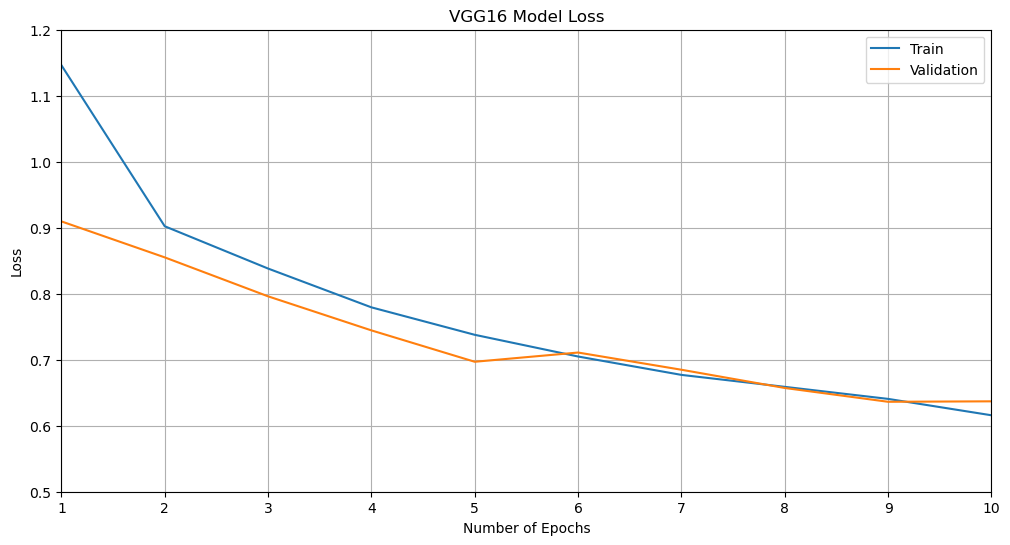

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

epochs_range= range(1,11)

plt.plot( epochs_range, history_vgg.history['loss'], label="Training Accuracy")

plt.plot(epochs_range, history_vgg.history['val_loss'], label="Validation Accuracy")

plt.axis(ymin=0.5,ymax=1.2, xmin=1,xmax=10)

plt.grid()

plt.title('VGG16 Model Loss')

plt.ylabel('Loss')

plt.xlabel('Number of Epochs')

plt.legend(['Train', 'Validation'])

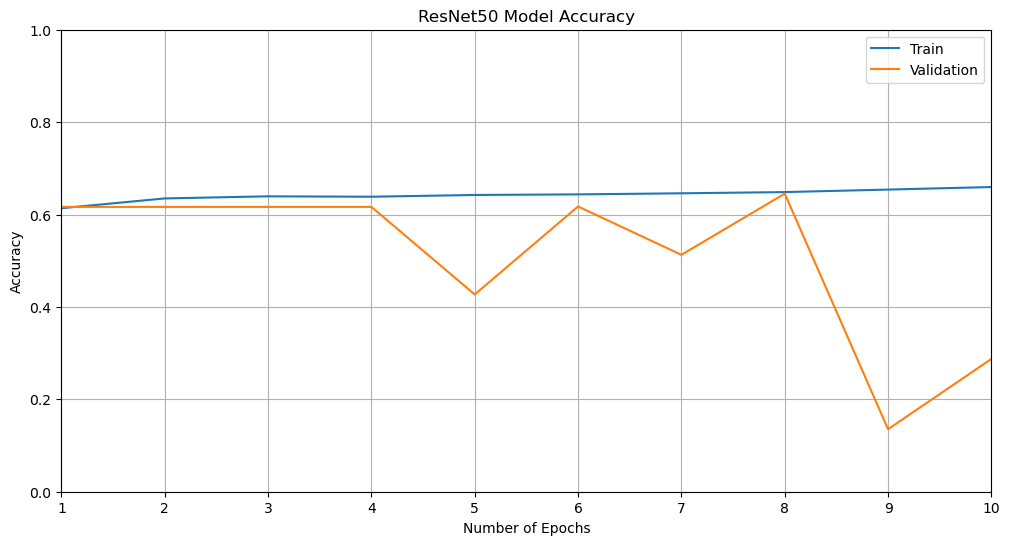

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

epochs_range= range(1,11)

plt.plot( epochs_range, history_resnet.history['accuracy'], label="Training Accuracy")

plt.plot(epochs_range, history_resnet.history['val_accuracy'], label="Validation Accuracy")

plt.axis(ymin=0,ymax=1, xmin=1,xmax=10)

plt.grid()

plt.title('ResNet50 Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Number of Epochs')

plt.legend(['Train', 'Validation'])

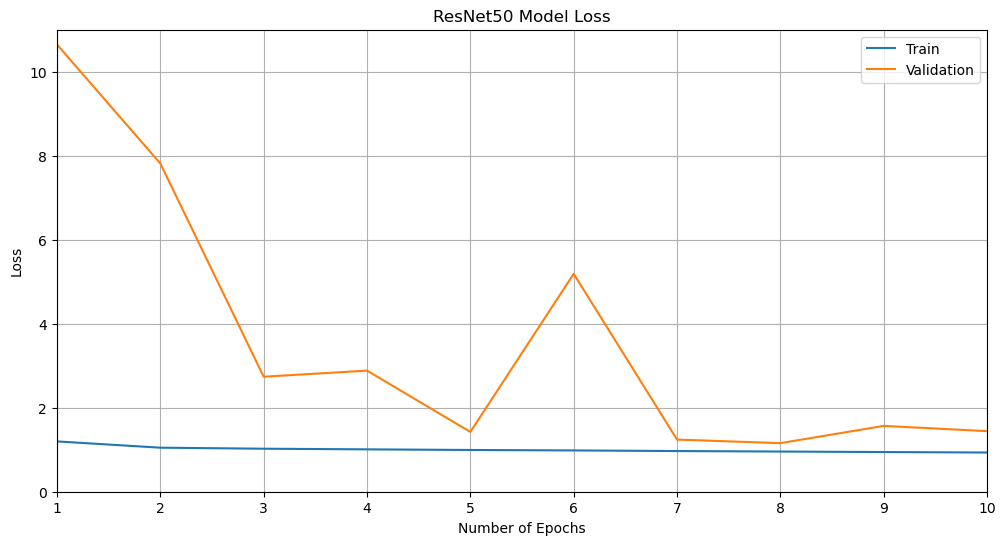

In [59]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

epochs_range= range(1,11)

plt.plot( epochs_range, history_resnet.history['loss'], label="Training Loss")

plt.plot(epochs_range, history_resnet.history['val_loss'], label="Validation Loss")

plt.axis(ymin=0,ymax=11, xmin=1,xmax=10)

plt.grid()

plt.title('ResNet50 Model Loss')

plt.ylabel('Loss')

plt.xlabel('Number of Epochs')

plt.legend(['Train', 'Validation'])

In [ ]:
plt.show()

In [44]:
test = pd.read_csv('C:/Users/sahil/Downloads/cassava-leaf-disease-classification/sample_submission.csv')
print(test)

         image_id  label
0  2216849948.jpg      4


In [45]:
preds = []

for image_id in test.image_id:
    image = Image.open('C:/Users/sahil/Downloads/cassava-leaf-disease-classification/test_images/'+image_id)
    image = image.resize((256,256))
    image = np.expand_dims(image, axis = 0)
    preds.append(np.argmax(resnet_model.predict(image)))

test['label'] = preds
print(test)

1/1 [==============================] - 1s 811ms/step
         image_id  label
0  2216849948.jpg      1
